# Correlation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [4]:
# load the data
df = pd.read_csv(data)

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
# replace column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

# replace categorical column values to lowercase and replace spaces with underscores
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [12]:
# convert totalcharges to numeric, coerce errors to NaN
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [13]:
categorical_columns = [
'gender',
'partner',
'dependents',
'phoneservice',
'multiplelines',
'internetservice',
'onlinesecurity',
'onlinebackup',
'deviceprotection',
'techsupport',
'streamingtv',
'streamingmovies',
'contract',
'paperlessbilling',
'paymentmethod'
]

numeric_columns = [
    'seniorcitizen',
    'tenure',
    'monthlycharges',
    'totalcharges'
]


In [14]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [25]:
y_target = df.churn.map({'yes':1, 'no':0})
df['churn'] = y_target

In [15]:
dfnum = df[numeric_columns]

In [17]:
# caluclate correlation of each column with the target
dfnum.corrwith(y_target).sort_values(ascending=False)

monthlycharges    0.193356
seniorcitizen     0.150889
totalcharges     -0.199484
tenure           -0.352229
dtype: float64

Correlation only measure linear association, not actual predictive.
The correlation value is range from -1 to +1.
It show how much target variable (y) tends to increase or decrease when feature (X) increases.
* If X increases and y also increases, the correlation is positive.
* If X increases and y decreases, the correlation is negative.
* If X changes but y remain the same, the correlation is zero. Meaning X doesn't have linear effect on y.

In this case above:
* monthlycharge and seniorcitizen have positive coorelation. It means increasing monthlycharge and seniorcitizen will  raise posibility to churn.
* totalcharges and tenure have negative correlation. It means increasing totalcharges and tenure will reduce posibility to churn.


C:\Users\biggi\AppData\Local\Temp\ipykernel_12132\504920605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnum['churn'] = y_target


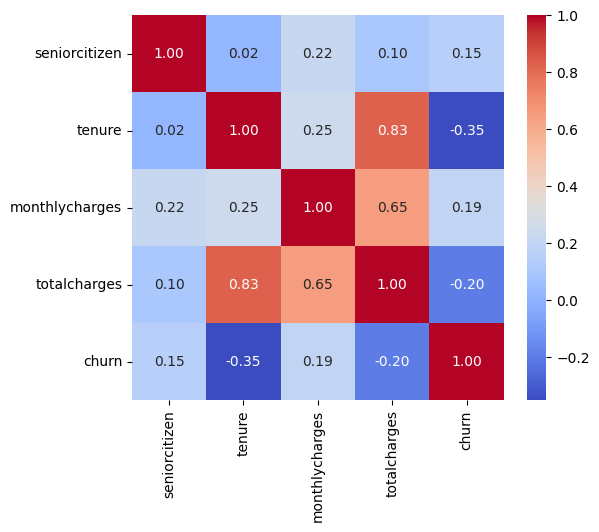

In [20]:
# plot correlation matrix into heatmap
# append target column to dfnum
dfnum['churn'] = y_target
# calculate correlation matrix
corr = dfnum.corr()

# plot heatmap

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


Tenure churn

<Axes: >

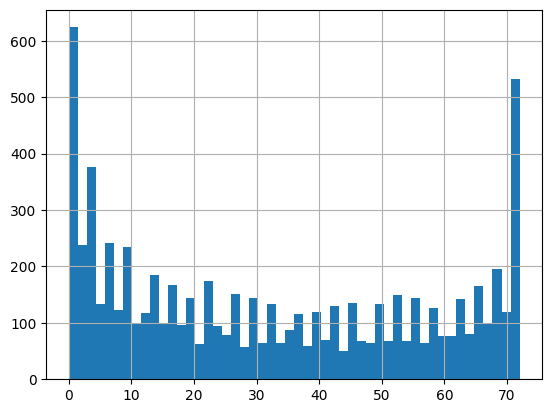

In [23]:
dfnum['tenure'].hist(bins=50)

In [43]:
#print(df[df['tenure']<20].churn.mean())
#print(df[(df['tenure']>=20) & (df['tenure']<40)].churn.mean())
#print(df[(df['tenure']>=40) & (df['tenure']<60)].churn.mean())
#print(df[df['tenure']>=60].churn.mean())

tenure_churn = []
for i in range(0, 80, 20):
    t = {
        'tenure': f'{i}-{i+20}',
        'churn_rate': df[(df['tenure']>=i) & (df['tenure']<i+20)].churn.mean()
    }
    tenure_churn.append(t)

tenure_churn

[{'tenure': '0-20', 'churn_rate': 0.43925899536872104},
 {'tenure': '20-40', 'churn_rate': 0.22614840989399293},
 {'tenure': '40-60', 'churn_rate': 0.16218236173393125},
 {'tenure': '60-80', 'churn_rate': 0.0667565745111261}]

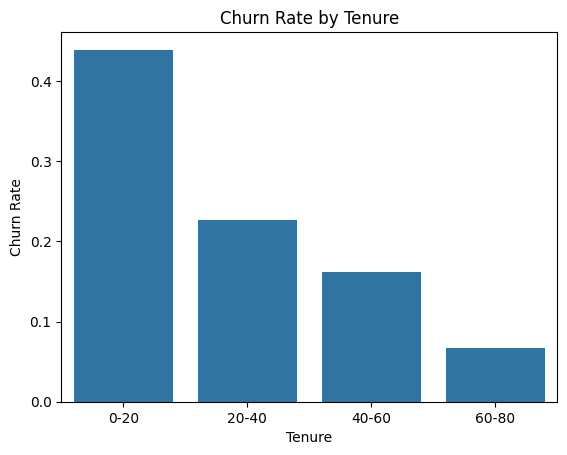

In [44]:
sns.barplot(data=pd.DataFrame(tenure_churn), x='tenure', y='churn_rate')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure')
plt.show()


it show higher tenure churn rate decrease

monthlycharges churn

<Axes: >

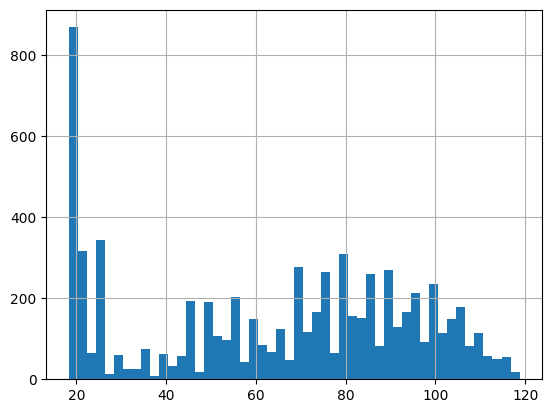

In [46]:
dfnum['monthlycharges'].hist(bins=50)

In [48]:
monthlycharges_churn = []
for i in range(0, 80, 20):
    t = {
        'monthlycharges': f'{i}-{i+20}',
        'churn_rate': df[(df['monthlycharges']>=i) & (df['monthlycharges']<i+20)].churn.mean()
    }
    monthlycharges_churn.append(t)

monthlycharges_churn

[{'monthlycharges': '0-20', 'churn_rate': 0.08972267536704731},
 {'monthlycharges': '20-40', 'churn_rate': 0.12908496732026145},
 {'monthlycharges': '40-60', 'churn_rate': 0.25794392523364484},
 {'monthlycharges': '60-80', 'churn_rate': 0.32213845099383137}]

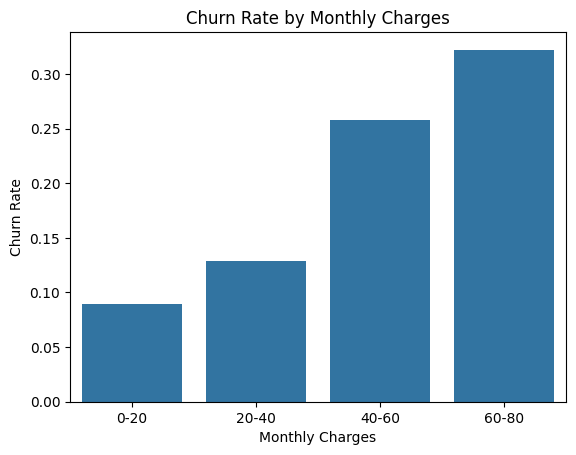

In [49]:
sns.barplot(data=pd.DataFrame(monthlycharges_churn), x='monthlycharges', y='churn_rate')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Monthly Charges')
plt.show()


it show higher monthlycharges churn rate increase